House Prices: Advanced Regression Techniques

In [206]:
import numpy as np
import pandas as pd
import warnings
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [207]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [208]:
train = pd.read_csv('house_prices_train.csv', sep=',')
test = pd.read_csv('house_prices_test.csv', sep=',')

In [209]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [210]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


сразу посмотрим на пустоту

In [211]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [212]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [213]:
missing_values_table(test)

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


**Первый вывод, по большинству данных за Null  принимается отстутвсие сабжекта, что собственно не совсем верно. потому часть придется преобразовать в категорию - "absent"**

ну хоть метки не пустые. первые 4 сразу удалим. Камин удалять не хочу. люблю камины. будем смотреть

In [214]:
missing_values_table(train)[0:4].index

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [215]:
train=train.drop(missing_values_table(train)[0:4].index, axis=1)
test=test.drop(missing_values_table(test)[0:4].index, axis=1)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


In [216]:
train.shape, test.shape

((1460, 77), (1459, 76))

Посмотрим на корреляцию числовых признаков с целевым. 

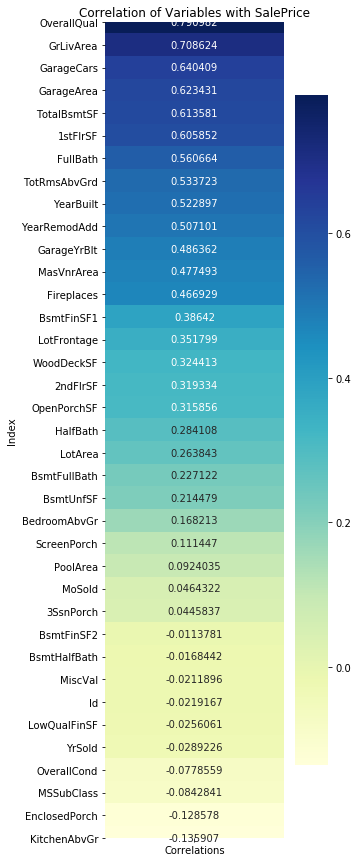

In [217]:
corr = train.corrwith(train['SalePrice'])[:-1].reset_index()
corr.columns = ['Index', 'Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with SalePrice");

как видно, очень высокая корреляция прзинако "Гараж" с целевым. так же достоточная корреляция у признака "LotFrontage". Дропать не будем. 

**посмотрим на баланс значений по признакам**

In [218]:
for i in train.columns:
    if train[i].value_counts().shape[0] < 4:
        print(train[i].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


удаляем Utilities и Street

In [219]:
train=train.drop(['Utilities', 'Street'], axis=1)
test=test.drop(['Utilities', 'Street'], axis=1)

**Fireplace**

In [220]:
for dataset in [train, test]:
    dataset['FireplaceQu'] =  dataset['LotFrontage'].fillna('absent')


**LotFrontag**

In [221]:
for dataset in [train, test]:
    dataset['LotFrontage'] =  dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

**Garage**

In [222]:
for dataset in [train, test]:
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        dataset[col] = dataset[col].fillna('absent')


In [223]:
for dataset in [train, test]:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

**Basement**

In [224]:
for dataset in [train, test]:
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        dataset[col] = dataset[col].fillna('absent')

**MasVnr**

кладку заменим самым популярным типом

In [225]:
for dataset in [train, test]:
    for col in ('MasVnrType','MasVnrArea'):
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])


**Остальное**

заменим по документации и модой

In [226]:
for dataset in [train, test]:
    dataset['Electrical'] = dataset['Electrical'].fillna("SBrkr")
    dataset['Functional'] = dataset['Functional'].fillna("Typ")
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna("TA")
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
    dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
    dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].mode()[0])
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mode()[0])
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].mode()[0])
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mode()[0])
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].mode()[0])
    
   

**Engineering**



**посмотрим на корреляцию м/у признаками( видно что есть например, год постройи дома и гаража) - удалим ненужные/преобразуем в новые**

In [227]:
from feature_selector import FeatureSelector

In [228]:
fs = FeatureSelector(data = train.drop(columns=['SalePrice']), labels = train['SalePrice'])

In [229]:
fs.identify_collinear(correlation_threshold = 0.6)

9 features with a correlation magnitude greater than 0.60.



In [230]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,1stFlrSF,TotalBsmtSF,0.819530
1,GrLivArea,2ndFlrSF,0.687501
2,BsmtFullBath,BsmtFinSF1,0.649212
3,FullBath,GrLivArea,0.630012
4,HalfBath,2ndFlrSF,0.609707
5,TotRmsAbvGrd,2ndFlrSF,0.616423
6,TotRmsAbvGrd,GrLivArea,0.825489
7,TotRmsAbvGrd,BedroomAbvGr,0.676620
8,GarageYrBlt,YearBuilt,0.825667
9,GarageYrBlt,YearRemodAdd,0.642277


    1. год постройки гаража коррелируется с годом постройки дома - удалим
    2. много ванн/коррелируют -  сложим признаки (обычно важно сколько всего ванн)
    3. есть общая площадь над землей/есть подвал/есть ванные/кухя. проверить равентсно (модет оставить только жилую). посмотреть на корреляцию
    4. Подвал - есть понятие как заверженный и не завершенный. посмотреть на долю есил незавершенны- очень мало - удалим
    5. есть территории снаружи дома/стоит объединить.

In [231]:
corr

,Correlations
Index,
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


сложим ванные вместе

In [232]:
for dataset in [train, test]:
    dataset['FullBathroom']=(dataset['FullBath'] + (0.5*dataset['HalfBath']) + 
                               dataset['BsmtFullBath'] + (0.5*dataset['BsmtHalfBath']))

проверим площадь

как видим - равенство - думаю стоить удалить этажи / оставитв данные только об общей жилой площади

In [233]:
print(train['GrLivArea'].sum(), train['1stFlrSF'].sum(), train['2ndFlrSF'].sum())

2212577 1697435 506609


Подвал 53% недостроя. думаю в тотале. притом что тотал имеет очень сильную корреляцию на метку - предлагаю оставитть только законченную площать и не законченную

п.с. очень странно, что суммы не сходятся

In [234]:
train['BsmtUnfSF'].sum()/train['TotalBsmtSF'].sum()

0.536433338277692

In [235]:
print(train['TotalBsmtSF'].sum(), train['BsmtUnfSF'].sum(), train['BsmtFinSF1'].sum(),train['BsmtFinSF2'].sum())

1543847 828171 647714 67962


In [236]:
for dataset in [train, test]:
    dataset['Total_fin'] = (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'])

объеденим терр. снаружи

In [237]:
for dataset in [train, test]:
    dataset['outside'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] +
                             dataset['EnclosedPorch'] + dataset['ScreenPorch'] +
                             dataset['WoodDeckSF'])

MSSubClass - не число / заменим тип

In [238]:
for dataset in [train, test]:
    dataset['MSSubClass'] = dataset['MSSubClass'].astype('object')

цена по годам

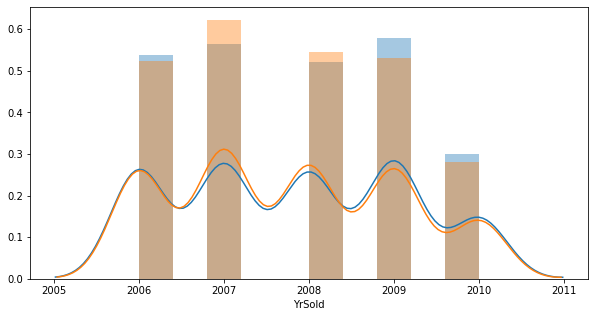

In [239]:
plt.figure(figsize=(10,5))
sns.distplot(train['YrSold'],bins=10)
sns.distplot(test['YrSold'],bins=10)
plt.show()


Как видим, цены предсавлены за 5 лет. Идея состоит в следующем:
Зная, что цены в США росли до лета 2007 года, а далее в 2008 начали падать (https://fred.stlouisfed.org/series/USSTHPI). Думается стоит заменть даты продаж на группы (до кризиза и после - два периода падения с 2008 по 2009 и после 2009

In [240]:
train['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [241]:
test['YrSold'].value_counts()

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

In [242]:
for dataset in [train, test]:
    dataset['crysis'] = dataset['YrSold'].map({2006: 1, 2007: 1, 2008: 2, 2009: 3, 2010: 3}).fillna(0)
    
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FullBathroom,Total_fin,outside,crysis
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,3.5,706,61,2
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,2.5,978,298,1
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,3.5,486,42,2
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,2.0,216,307,1
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,3.5,655,276,2


In [243]:
train['crysis'].value_counts()

1    643
3    513
2    304
Name: crysis, dtype: int64

In [244]:
for dataset in [train, test]:
    dataset['crysis'] = dataset['crysis'].astype('object')

In [245]:
train1=train.copy()
test1=test.copy()

In [246]:
col=['OpenPorchSF','3SsnPorch', 'EnclosedPorch','ScreenPorch','WoodDeckSF',
     'TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GarageYrBlt',
     'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','Id','MoSold','YrSold','PoolArea']

In [247]:
train1=train1.drop(col,axis=1)
test1=test1.drop(col,axis=1)    

In [248]:
missing_values_table(test1)

Your selected dataframe has 59 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
FullBathroom,2,0.1


In [249]:
for dataset in [train1, test1]:
    dataset['FullBathroom'] = dataset['FullBathroom'].fillna(dataset['FullBathroom'].mode()[0])

**нормализуем признаки/посмотрим на распределение метки**

In [250]:
from scipy.stats import skew

In [251]:
train_features=train1.drop(columns=['SalePrice'])

In [252]:
features = pd.concat([train_features, test1]).reset_index(drop=True)
features.shape

(2919, 59)

In [253]:
Y = train1['SalePrice']

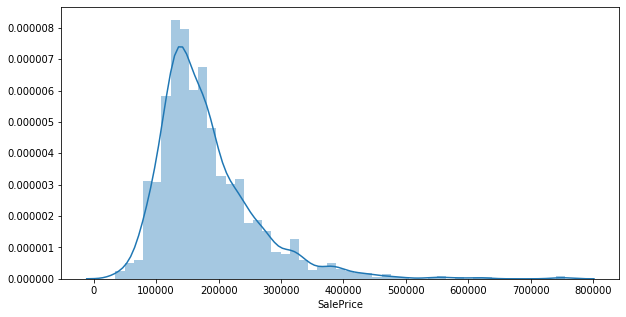

In [254]:
plt.figure(figsize=(10,5))
sns.distplot(Y)
plt.show()



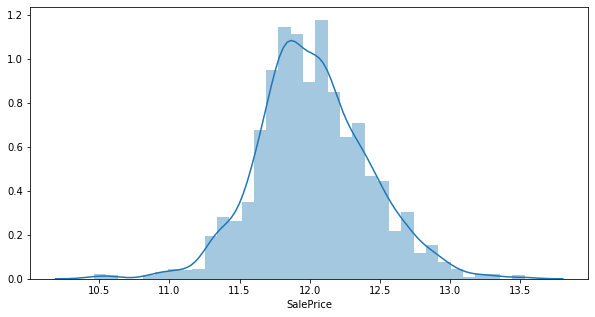

In [255]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(Y))
plt.show()


In [256]:
Y=np.log(Y)

проверим на выбросы. заюзаем холма

In [257]:
features_out = pd.get_dummies(train_features).reset_index(drop=True)


In [258]:
import statsmodels

In [259]:
import statsmodels.api as sm

In [260]:
ols=sm.OLS(endog = Y, exog = features_out)

In [162]:
fit = ols.fit()

In [163]:
outlines=fit.outlier_test('holm')

In [169]:
outlines[outlines['holm(p)']<0.01]

,student_resid,unadj_p,holm(p)
88,4.976709,7.484824e-07,1.087545e-03
462,-6.522535,1.045397e-10,1.522098e-07
523,-8.332084,2.306353e-16,3.367276e-13
632,-6.870916,1.057751e-11,1.541143e-08
825,8.332084,2.306353e-16,3.367276e-13
968,-5.178869,2.646447e-07,3.847933e-04
970,4.689417,3.078126e-06,4.469439e-03
1106,-8.332084,2.306353e-16,3.367276e-13
1324,-6.411740,2.118778e-10,3.082822e-07


уровень за-ти 0,01 - удалим выбросы

In [261]:
outlines[outlines['holm(p)']<0.01].index

Int64Index([88, 462, 523, 632, 825, 968, 970, 1106, 1324], dtype='int64')

In [262]:
features=features.drop(features.index[outlines[outlines['holm(p)']<0.01].index])


In [264]:
Y=Y.drop(Y.index[outlines[outlines['holm(p)']<0.01].index])

нормализуем вещ признаки

In [265]:
numeriсs = ['int64', 'float64']

num = []
cat=[]
for i in features.columns:
    if features[i].dtype in numeriсs:
        
        num.append(i)
    else:
        cat.append(i)

In [266]:
skew_features = features[num].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features

MiscVal         21.913323
LotArea         12.888265
LowQualFinSF    12.387210
KitchenAbvGr     4.294580
MasVnrArea       2.623002
LotFrontage      1.680942
outside          1.377265
GrLivArea        1.215833
Total_fin        1.175022
BsmtUnfSF        0.919139
TotRmsAbvGrd     0.754254
Fireplaces       0.735521
OverallCond      0.578572
FullBathroom     0.491759
BedroomAbvGr     0.325365
GarageArea       0.236074
OverallQual      0.194253
GarageCars      -0.215823
YearRemodAdd    -0.451854
YearBuilt       -0.599848
dtype: float64

выберем признаки со скосом от 0,5 и нормальизуем ( до этого посчитаем оптимальый параметр лямбда с помощью boxcox_normmax)
для нормализации восользуемся boxcox1p а не boxcox (т.к. в данных есть нули - и будет вылетать в бесконечно при приобразовани)

In [267]:
from scipy.special import boxcox1p

In [268]:
from scipy.stats import boxcox_normmax

In [269]:
high_skew = skew_features[abs(skew_features) > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i]= boxcox1p(features[i], boxcox_normmax(features[i]+1))



In [270]:
features[num].apply(lambda x: skew(x)).sort_values(ascending=False)


LowQualFinSF    8.595232
MiscVal         5.231286
KitchenAbvGr    3.772872
MasVnrArea      0.976874
Fireplaces      0.555981
FullBathroom    0.491759
Total_fin       0.399811
OverallCond     0.385877
BedroomAbvGr    0.325365
GarageArea      0.236074
OverallQual     0.194253
outside         0.186264
BsmtUnfSF       0.053965
LotFrontage     0.049605
TotRmsAbvGrd    0.047147
GrLivArea       0.005567
LotArea        -0.137257
GarageCars     -0.215823
YearBuilt      -0.254737
YearRemodAdd   -0.451854
dtype: float64

In [271]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.shape

(2910, 407)

In [272]:
final_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Columns: 407 entries, LotFrontage to crysis_3
dtypes: float64(17), int64(3), uint8(387)
memory usage: 1.5 MB


In [273]:
train_fin = final_features.iloc[:len(Y),:]
test_fin = final_features.iloc[len(Y):,:]
print(train_fin.shape,Y.shape,test_fin.shape)

(1451, 407) (1451,) (1459, 407)


In [274]:
train_fin['SalePrice']=Y

In [275]:
X=train_fin.drop(columns=['SalePrice'])

проверим на оверфит и удалим признаки с сильным перекосом значений 

In [276]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [277]:
overfit

['MSSubClass_150',
 'Condition2_PosN',
 'FireplaceQu_22.0',
 'FireplaceQu_25.0',
 'FireplaceQu_26.0',
 'FireplaceQu_28.0',
 'FireplaceQu_31.0',
 'FireplaceQu_113.0',
 'FireplaceQu_114.0',
 'FireplaceQu_117.0',
 'FireplaceQu_119.0',
 'FireplaceQu_123.0',
 'FireplaceQu_125.0',
 'FireplaceQu_126.0',
 'FireplaceQu_131.0',
 'FireplaceQu_133.0',
 'FireplaceQu_135.0',
 'FireplaceQu_136.0',
 'FireplaceQu_155.0',
 'FireplaceQu_195.0',
 'FireplaceQu_200.0']

In [278]:
train_final = train_fin.drop(overfit, axis=1)
test_final = test_fin.drop(overfit, axis=1)

In [279]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,crysis_1,crysis_2,crysis_3,SalePrice
0,13.414393,13.497469,7,3.958642,2.651617e+51,2003,19.415220,29.981183,0.0,7.589134,...,0,0,0,0,1,0,0,1,0,12.247694
1,15.009713,13.770111,6,5.937158,2.136086e+51,1976,0.000000,44.118585,0.0,7.273948,...,0,0,0,0,1,0,1,0,0,12.109011
2,13.747515,14.113084,7,3.958642,2.609753e+51,2002,17.753137,56.872821,0.0,7.634295,...,0,0,0,0,1,0,0,1,0,12.317167
3,12.841126,13.758896,7,3.958642,1.296232e+51,1970,0.000000,64.780646,0.0,7.593376,...,1,0,0,0,0,0,1,0,0,11.849398
4,15.408464,14.634319,8,3.958642,2.589054e+51,2000,25.377520,61.140258,0.0,7.850017,...,0,0,0,0,1,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,13.073271,13.359367,6,3.958642,2.568509e+51,2000,0.000000,90.715858,0.0,7.550159,...,0,0,0,0,1,0,1,0,0,11.969717
1447,15.506613,14.459190,6,4.637037,2.170789e+51,1988,15.330031,68.213577,0.0,7.789140,...,0,0,0,0,1,0,0,0,1,12.388394
1448,13.526295,13.641795,7,6.564115,1.606867e+51,2006,0.000000,86.366665,0.0,7.915128,...,0,0,0,0,1,0,0,0,1,11.626254
1449,13.747515,13.796146,5,4.637037,1.729754e+51,1996,0.000000,0.000000,0.0,7.110671,...,0,0,0,0,1,0,0,0,1,11.429544


In [280]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,crysis_1,crysis_2,crysis_3,SalePrice
0,13.414393,13.497469,7,3.958642,2.651617e+51,2003,19.415220,29.981183,0.0,7.589134,...,0,0,0,0,1,0,0,1,0,12.247694
1,15.009713,13.770111,6,5.937158,2.136086e+51,1976,0.000000,44.118585,0.0,7.273948,...,0,0,0,0,1,0,1,0,0,12.109011
2,13.747515,14.113084,7,3.958642,2.609753e+51,2002,17.753137,56.872821,0.0,7.634295,...,0,0,0,0,1,0,0,1,0,12.317167
3,12.841126,13.758896,7,3.958642,1.296232e+51,1970,0.000000,64.780646,0.0,7.593376,...,1,0,0,0,0,0,1,0,0,11.849398
4,15.408464,14.634319,8,3.958642,2.589054e+51,2000,25.377520,61.140258,0.0,7.850017,...,0,0,0,0,1,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,13.073271,13.359367,6,3.958642,2.568509e+51,2000,0.000000,90.715858,0.0,7.550159,...,0,0,0,0,1,0,1,0,0,11.969717
1447,15.506613,14.459190,6,4.637037,2.170789e+51,1988,15.330031,68.213577,0.0,7.789140,...,0,0,0,0,1,0,0,0,1,12.388394
1448,13.526295,13.641795,7,6.564115,1.606867e+51,2006,0.000000,86.366665,0.0,7.915128,...,0,0,0,0,1,0,0,0,1,11.626254
1449,13.747515,13.796146,5,4.637037,1.729754e+51,1996,0.000000,0.000000,0.0,7.110671,...,0,0,0,0,1,0,0,0,1,11.429544


**Baseline**

**Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)**

In [281]:
train_final=train_final.drop('SalePrice',axis=1)

In [282]:
from sklearn import ensemble, tree, linear_model,model_selection
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler



In [283]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [284]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LassoLarsIC

In [285]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=23)

In [286]:
regressor = linear_model.ElasticNet(random_state = 0)

In [287]:
regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [288]:
parameters_grid = {
    
    'l1_ratio' : np.linspace(0.8, 1.3, num = 50),
    'alpha' : np.linspace(0.0001, 0.01, num = 100), 
    
    
}


In [289]:
grid_cv = model_selection.GridSearchCV(regressor, parameters_grid, scoring = 'r2', cv = kfolds)

In [290]:
grid_cv

GridSearchCV(cv=KFold(n_splits=10, random_state=23, shuffle=True),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=0, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001, 0.0002,...
       1.05510204, 1.06530612, 1.0755102 , 1.08571429, 1.09591837,
       1.10612245, 1.11632653, 1.12653061, 1.13673469, 1.14693878,
       1.15714286, 1.16734694, 1.17755102, 1.1877551 , 1.19795918,
       1.20816327, 1.21836735, 1.22857143, 1.23877551, 1.24897959,
       1.25918367, 1.26938776, 1.27959184, 1.28979592, 1.3       ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2

In [86]:
grid_cv.fit(train_final, Y)

KeyboardInterrupt: 

In [186]:
grid_cv.best_estimator_

ElasticNet(alpha=0.0008, copy_X=True, fit_intercept=True, l1_ratio=1.0,
           max_iter=9, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [187]:
print (grid_cv.best_score_) 
print (grid_cv.best_params_)

0.8828231781455538
{'alpha': 0.0008, 'l1_ratio': 1.0, 'max_iter': 9}


In [291]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train_final, Y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = 3))
    return(rmse)



In [293]:
ENet = linear_model.ElasticNet(alpha=0.0008, l1_ratio=1.01)

In [294]:
score = cv_rmse(ENet)
print("ElasticNet score: {:.4f}".format(score.mean()))

ElasticNet score: 0.1168


In [295]:
elastic_model = ENet.fit(train_final, Y)

In [296]:
Final = np.exp(elastic_model.predict(test_final))

In [297]:
pd.DataFrame({'Id': test.Id, 'SalePrice': Final}).to_csv('houses.csv', index =False)